In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping


Using TensorFlow backend.


In [2]:
#koneksi ke google drive

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#preprocessing gambar
path_img = '/content/drive/My Drive/dataset/rps-cv-images/'
gambar = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    height_shift_range=.2,
    validation_split = 0.2,

    vertical_flip = True,
    

)

train_gen = gambar.flow_from_directory(
  path_img,
  target_size=(224,224),
  batch_size= 64,
  class_mode = 'categorical',
  shuffle=True,
  


)
val_gen = gambar.flow_from_directory(
    path_img,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False,
    subset = 'validation'
)


Found 2188 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
#callback
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=7)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [0]:
#membuat model
#Training model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 774400)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               99123328  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [7]:
hist_model = model.fit_generator(train_gen,epochs=25,
                                 validation_data=val_gen,
                                 callbacks=[es,mc],steps_per_epoch=7,validation_steps=7
                                 )

Epoch 1/25
7/7 [==============================] - 130s 19s/step - loss: 5.3489 - accuracy: 0.5589 - val_loss: 0.0206 - val_accuracy: 0.5652

Epoch 00001: val_accuracy improved from -inf to 0.56522, saving model to best_model.h5
Epoch 2/25
7/7 [==============================] - 113s 16s/step - loss: 1.8392 - accuracy: 0.6049 - val_loss: 0.6905 - val_accuracy: 0.6911

Epoch 00002: val_accuracy improved from 0.56522 to 0.69108, saving model to best_model.h5
Epoch 3/25
7/7 [==============================] - 113s 16s/step - loss: 0.6097 - accuracy: 0.6912 - val_loss: 0.6182 - val_accuracy: 0.7239

Epoch 00003: val_accuracy improved from 0.69108 to 0.72387, saving model to best_model.h5
Epoch 4/25
7/7 [==============================] - 109s 16s/step - loss: 0.5642 - accuracy: 0.7001 - val_loss: 0.4222 - val_accuracy: 0.7391

Epoch 00004: val_accuracy improved from 0.72387 to 0.73913, saving model to best_model.h5
Epoch 5/25
7/7 [==============================] - 116s 17s/step - loss: 0.6512 

In [9]:
#Getting summary
summary=hist_model.history
print(summary)

{'val_loss': [0.020634528249502182, 0.6905020475387573, 0.6181561946868896, 0.42216357588768005, 0.622940719127655, 0.7104080319404602, 0.5747555494308472, 0.3752101957798004, 0.5372899770736694, 0.4520999491214752, 0.48509645462036133, 0.6102379560470581, 0.34311601519584656, 0.3762480318546295, 0.3000224232673645, 0.3581163287162781, 0.22287297248840332, 0.33703750371932983, 0.4377278983592987, 0.29992881417274475, 0.4359871447086334, 0.2923751473426819, 0.25338172912597656, 0.27093303203582764, 0.4229064881801605], 'val_accuracy': [0.5652173757553101, 0.6910755038261414, 0.7238749265670776, 0.739130437374115, 0.6880244016647339, 0.6674294471740723, 0.6681922078132629, 0.7894737124443054, 0.7452326416969299, 0.8268498182296753, 0.8283752799034119, 0.8390542268753052, 0.8649885654449463, 0.8977879881858826, 0.9031273722648621, 0.8970251083374023, 0.9084668159484863, 0.920671284198761, 0.9023646116256714, 0.9260107278823853, 0.9145690202713013, 0.9275362491607666, 0.9305872917175293, 0

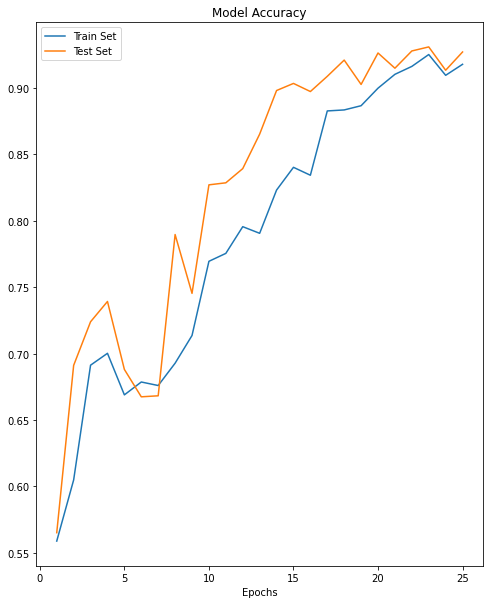

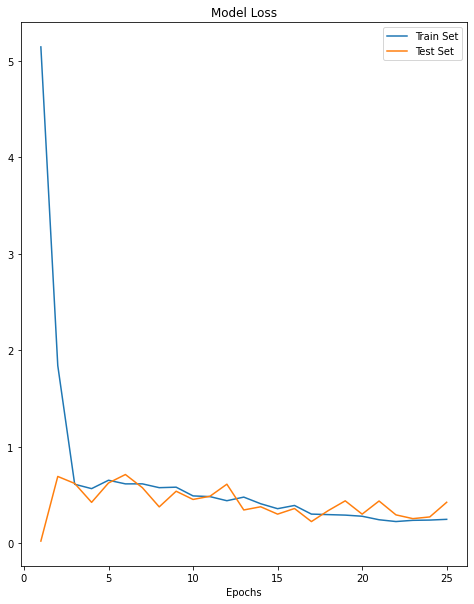

In [12]:
import matplotlib.pyplot as plt

epochs = 25
accur = hist_model.history['accuracy']
val_acc = hist_model.history['val_accuracy']
loss = hist_model.history['loss']
val_loss = hist_model.history['val_loss']
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(8,10))
plt.plot(epochs_range, accur, label='Train Set')
plt.plot(epochs_range, val_acc, label='Test Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.title('Model Accuracy')
plt.show()

plt.figure(figsize=(8,10))
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Test Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.title('Model Loss')
plt.show()

Saving 0zoQAmDFXehOZsAp.png to 0zoQAmDFXehOZsAp.png
0zoQAmDFXehOZsAp.png
[[0. 0. 1.]]
ini adalah gambar scissors


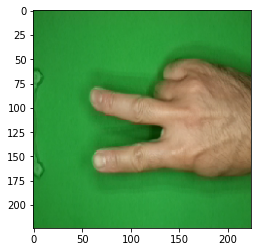

In [29]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
# plt.title("{}".format(class_names[np.argmax(fashion_mnist.train.labels[i])]))
uploaded = files.upload()
class_names = ['paper','rock','scissors']

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)
  print('ini adalah gambar {}'.format(class_names[np.argmax(classes)]))